## 📊 Number Summary & Box Plot

Before applying any transformation or model, it’s important to understand the **statistical summary** of our numerical data.

We’ll calculate key values like:
- **Minimum (Min)**
- **Maximum (Max)**
- **Median (Q2)**
- **First Quartile (Q1)**
- **Third Quartile (Q3)**
- **Interquartile Range (IQR)**

These help us understand:

✅ The **spread** of the data  
✅ Whether there are **outliers**  
✅ How **skewed** the distribution is

# 📊 Detecting Outliers using IQR (Interquartile Range)

In this section, we’ll calculate the **IQR**, find the **lower and upper fences**,  
and identify **outliers** in a list of student marks.

The dataset is small, so it’s easy to understand visually and statistically.


In [1]:
import numpy as np

In [28]:
# --------------------------------------------------------------
# 🧮 Step 1: Create a sample dataset
# --------------------------------------------------------------
list_marks = [45, 32, 56, 75, 89, 54, 32, 89, 90, 87, 67, 54, 98, 99, 67, 74]

# --------------------------------------------------------------
# ⚙️ Step 2: Compute Quartiles and IQR
# --------------------------------------------------------------
# np.quantile(data, [0, 0.25, 0.50, 0.75, 1.0])
# gives Min, Q1, Median (Q2), Q3, and Max
minimum, Q1, median, Q3, maximum = np.quantile(list_marks, [0, 0.25, 0.50, 0.75, 1.0])

print(f"Minimum: {minimum}")
print(f"Q1 (25th percentile): {Q1}")
print(f"Median (Q2): {median}")
print(f"Q3 (75th percentile): {Q3}")
print(f"Maximum: {maximum}")

# Interquartile Range → IQR = Q3 - Q1
IQR = Q3 - Q1
print(f"IQR (Interquartile Range): {IQR:.2f}")


Minimum: 32.0
Q1 (25th percentile): 54.0
Median (Q2): 70.5
Q3 (75th percentile): 89.0
Maximum: 99.0
IQR (Interquartile Range): 35.00


### 📘 What is IQR?
The **Interquartile Range (IQR)** measures the spread of the middle 50% of data:
$$
IQR = Q3 - Q1
$$

Values that fall **far below Q1** or **far above Q3** are considered **outliers**.
To find them, we calculate two thresholds called **fences**.


In [29]:
# --------------------------------------------------------------
# 🧩 Step 3: Calculate Lower and Upper Fences
# --------------------------------------------------------------
# Formula:
# Lower Fence = Q1 - 1.5 * IQR
# Upper Fence = Q3 + 1.5 * IQR
#
# ➤ Any value < Lower Fence → potential outlier (too small)
# ➤ Any value > Upper Fence → potential outlier (too large)

lower_fence = Q1 - 1.5 * IQR
higher_fence = Q3 + 1.5 * IQR

print(f"Lower Fence: {lower_fence:.2f}")
print(f"Upper Fence: {higher_fence:.2f}")


Lower Fence: 1.50
Upper Fence: 141.50


| Fence           | Formula                 | Meaning                                                  |
| --------------- | ----------------------- | -------------------------------------------------------- |
| **Lower Fence** | ( Q1 - 1.5 \times IQR ) | Any data point smaller than this → **outlier (too low)** |
| **Upper Fence** | ( Q3 + 1.5 \times IQR ) | Any data point larger than this → **outlier (too high)** |

---

### 💡 Example Interpretation

If:
- Q1 = 54  
- Q3 = 89  
- IQR = 35  

Then:
$$
\text{Lower Fence} = 54 - 1.5 \times 35 = 1.5 \\
\text{Upper Fence} = 89 + 1.5 \times 35 = 141.5
$$

✅ Any value < 1.5 or > 141.5 is considered an **outlier**.


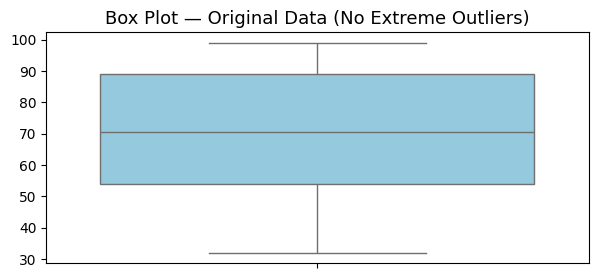

In [30]:
# --------------------------------------------------------------
# 🎨 Step 4: Visualize using Box Plot
# --------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7,3))
sns.boxplot(list_marks, color='skyblue')
plt.title("Box Plot — Original Data (No Extreme Outliers)", fontsize=13)
plt.show()


### ✅ Interpretation:
- The box represents data between Q1 and Q3
- The line inside the box is the median
- Whiskers show the non-outlier range
- Dots (if any) outside whiskers → outliers

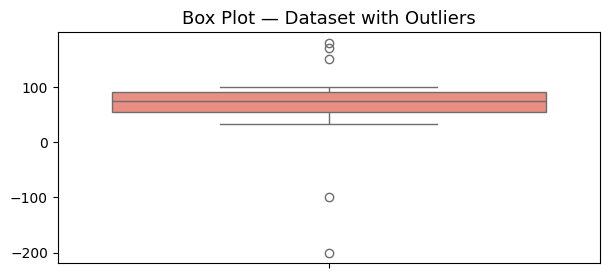

In [31]:
# --------------------------------------------------------------
# 🧪 Step 5: Add some extreme outliers and plot again
# --------------------------------------------------------------
list_marks = [-100, -200, 45, 32, 56, 75, 89, 54, 32, 89, 90, 87, 67, 54, 98, 99, 67, 74, 150, 170, 180]

plt.figure(figsize=(7,3))
sns.boxplot(list_marks, color='salmon')
plt.title("Box Plot — Dataset with Outliers", fontsize=13)
plt.show()


### ✅ Now you’ll see:
- The box and whiskers shrink to fit most of the normal values.
- The outliers (−100, −200, 150, 170, 180) appear as individual dots outside whiskers.

### 🧠 Summary

| Statistic | Meaning | Purpose |
|------------|----------|----------|
| **Q1, Q3** | Quartiles (25% and 75%) | Define boundaries for middle 50% of data |
| **IQR** | Q3 - Q1 | Measures the spread of central data |
| **Lower Fence** | Q1 - 1.5 × IQR | Detects extremely low outliers |
| **Upper Fence** | Q3 + 1.5 × IQR | Detects extremely high outliers |

✅ **In short:**
> The IQR method helps you **quantify and visualize outliers**.  
> Box plots make them easy to spot — dots outside whiskers are your **potential outliers** 🚨


## 🧮 Step 6 — Identify Outlier Values Using IQR Fences

Now that we’ve calculated the **lower** and **upper fences**,  
let’s automatically detect which marks fall **outside the acceptable range**.


In [32]:
# Reuse the data with outliers
list_marks = [-100, -200, 45, 32, 56, 75, 89, 54, 32, 89, 90, 87, 67, 54, 98, 99, 67, 74, 150, 170, 180]

# Step 1: Compute Q1, Q3, and IQR
Q1 = np.quantile(list_marks, 0.25)
Q3 = np.quantile(list_marks, 0.75)
IQR = Q3 - Q1

# Step 2: Compute lower and upper fences
lower_fence = Q1 - 1.5 * IQR
higher_fence = Q3 + 1.5 * IQR

# Step 3: Identify outliers using list comprehension
outliers = [x for x in list_marks if x < lower_fence or x > higher_fence]

print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
print(f"Lower Fence: {lower_fence}, Upper Fence: {higher_fence}")
print(f"Outliers Detected: {outliers}")


Q1: 54.0, Q3: 90.0, IQR: 36.0
Lower Fence: 0.0, Upper Fence: 144.0
Outliers Detected: [-100, -200, 150, 170, 180]


### 💡 How It Works

1️⃣ We already computed:
$$
\text{Lower Fence} = Q1 - 1.5 \times IQR
$$  
$$
\text{Upper Fence} = Q3 + 1.5 \times IQR
$$

2️⃣ Using a simple list comprehension,  
we check each mark `x` in the list:
- If `x < lower_fence` → mark is **too small** (low outlier)  
- If `x > higher_fence` → mark is **too large** (high outlier)

3️⃣ All such values are collected in the `outliers` list.


### 🧠 Interpretation

| Type | Condition | Example |
|-------|------------|----------|
| **Low Outliers** | Values less than Lower Fence | `-100`, `-200` |
| **High Outliers** | Values greater than Upper Fence | `170`, `180` |

✅ These points are **unusually far** from the rest of the data —  
they can distort your **mean**, **range**, or **model accuracy**.
